## 1. Prepare Dataset

### 1.1. Download Dataset

<img src="./data_fashion_mnist/data_info.png" width="800" height="400">


In [4]:
import numpy as np
from urllib import request
import gzip
import pickle
import os

filenames = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]

def download_fashion_mnist(folder):
    base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
    for name in filenames:
        print("Downloading " + name + "...")
        
        # lưu vào folder data_fashion_mnist
        request.urlretrieve(base_url + name, folder + name)
    print("Download complete.")

# download dataset và lưu vào folder 'data_fashion_mnist/'
folder = 'data_fashion_mnist/'
os.makedirs(folder, exist_ok=True)
download_fashion_mnist(folder)

Download complete.


### 1.2. Encode Dataset

In [5]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


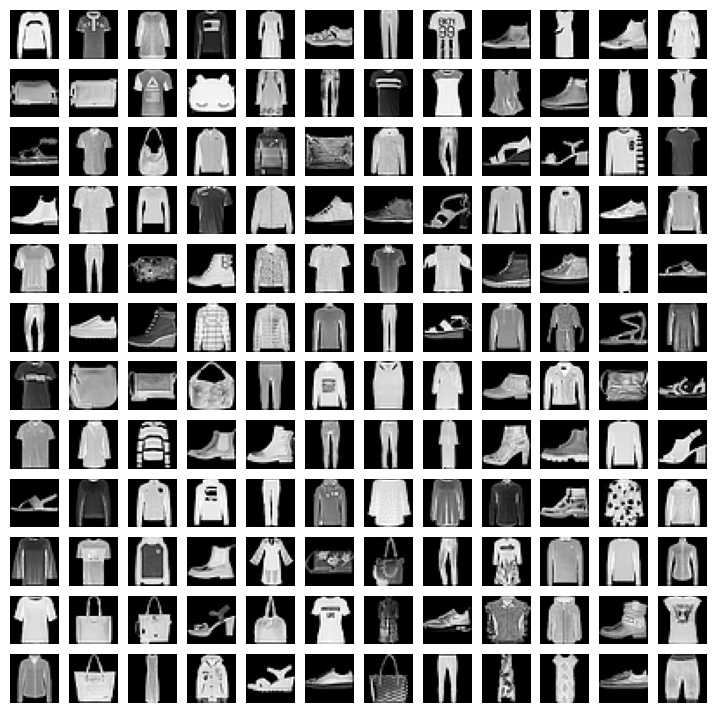

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 

# Tạo dang sách 144 phần tử ngẫu nhiên từ X_train có 60.000 phần tử
indices = list(np.random.randint(X_train.shape[0], size=144))

fig =plt.figure(figsize=(9,9))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

## 2. Training

### 2.1. Softmax

In [14]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history = model.fit(X_train, y_train,
            validation_data=(X_test,y_test),
            batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 0s - loss: 2302.1824 - sparse_categorical_accuracy: 0.6779 - val_loss: 1014.5210 - val_sparse_categorical_accuracy: 0.7030 - 448ms/epoch - 2ms/step
Epoch 2/100
235/235 - 0s - loss: 1276.1854 - sparse_categorical_accuracy: 0.7533 - val_loss: 1198.1880 - val_sparse_categorical_accuracy: 0.7538 - 218ms/epoch - 928us/step
Epoch 3/100
235/235 - 0s - loss: 1223.2836 - sparse_categorical_accuracy: 0.7606 - val_loss: 1107.6971 - val_sparse_categorical_accuracy: 0.7692 - 215ms/epoch - 916us/step
Epoch 4/100
235/235 - 0s - loss: 1068.5288 - sparse_categorical_accuracy: 0.7756 - val_loss: 2194.9773 - val_sparse_categorical_accuracy: 0.6973 - 245ms/epoch - 1ms/step
Epoch 5/100
235/235 - 0s - loss: 1107.2150 - sparse_categorical_accuracy: 0.7770 - val_loss: 1200.6108 - val_sparse_categorical_accuracy: 0.7751 - 230ms/epoch - 979us/step
Epoch 6/100
235/235 - 0s - loss: 1016.9321 - sparse_categorical_accuracy: 0.7806 - val_loss: 1590.2841 - val_sparse_categorical_accuracy: 0.6979

In [21]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

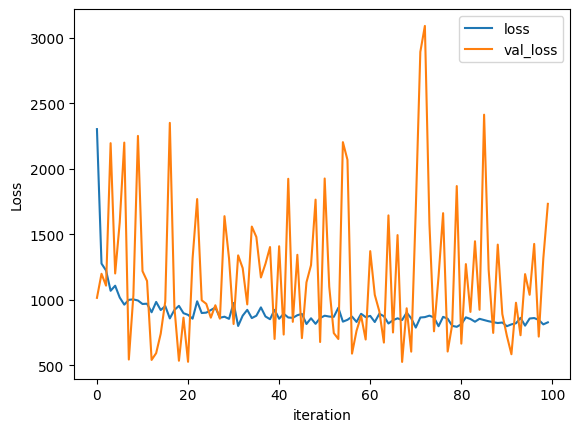

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

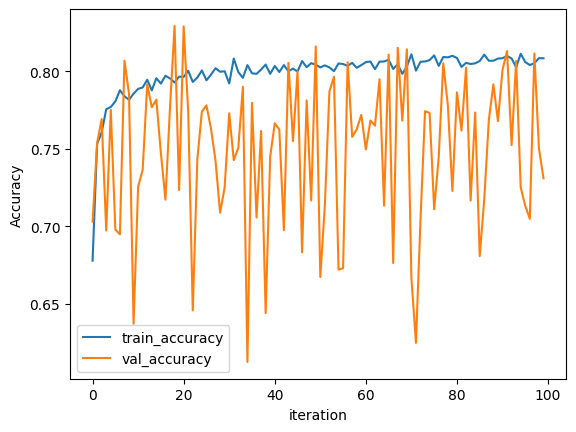

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 2.2. Softmax with Normalization1 -> [0,1]

In [ ]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [24]:
# data normalization
X_train = X_train/255.0
X_test  = X_test/255.0

In [25]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 0s - loss: 1.3934 - sparse_categorical_accuracy: 0.5831 - val_loss: 1.0424 - val_sparse_categorical_accuracy: 0.6738 - 388ms/epoch - 2ms/step
Epoch 2/100
235/235 - 0s - loss: 0.9283 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.8725 - val_sparse_categorical_accuracy: 0.7160 - 205ms/epoch - 873us/step
Epoch 3/100
235/235 - 0s - loss: 0.8130 - sparse_categorical_accuracy: 0.7414 - val_loss: 0.7958 - val_sparse_categorical_accuracy: 0.7393 - 202ms/epoch - 859us/step
Epoch 4/100
235/235 - 0s - loss: 0.7517 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.7485 - val_sparse_categorical_accuracy: 0.7545 - 204ms/epoch - 870us/step
Epoch 5/100
235/235 - 0s - loss: 0.7114 - sparse_categorical_accuracy: 0.7739 - val_loss: 0.7168 - val_sparse_categorical_accuracy: 0.7623 - 229ms/epoch - 975us/step
Epoch 6/100
235/235 - 0s - loss: 0.6819 - sparse_categorical_accuracy: 0.7831 - val_loss: 0.6911 - val_sparse_categorical_accuracy: 0.7705 - 201ms/epoch - 856us/step
Epoch 

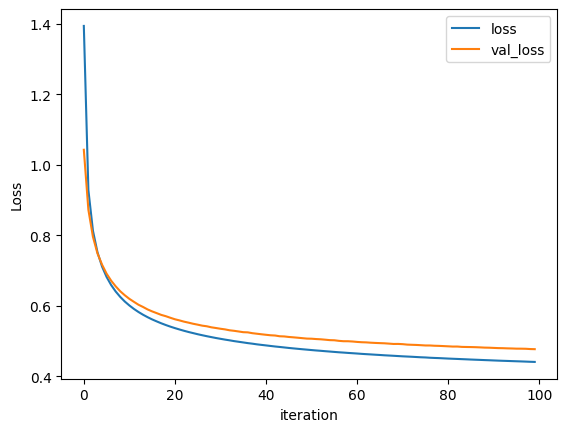

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

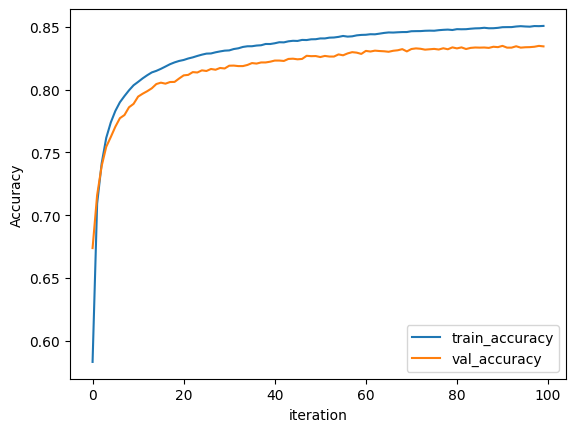

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 2.3. Softmax with Normalization2: std, mean

In [ ]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [30]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# data normalization
mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

In [31]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 0s - loss: 0.8482 - sparse_categorical_accuracy: 0.7188 - val_loss: 0.6445 - val_sparse_categorical_accuracy: 0.7785 - 417ms/epoch - 2ms/step
Epoch 2/100
235/235 - 0s - loss: 0.5890 - sparse_categorical_accuracy: 0.7973 - val_loss: 0.5790 - val_sparse_categorical_accuracy: 0.7987 - 212ms/epoch - 904us/step
Epoch 3/100
235/235 - 0s - loss: 0.5428 - sparse_categorical_accuracy: 0.8120 - val_loss: 0.5514 - val_sparse_categorical_accuracy: 0.8071 - 210ms/epoch - 892us/step
Epoch 4/100
235/235 - 0s - loss: 0.5177 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.5333 - val_sparse_categorical_accuracy: 0.8138 - 226ms/epoch - 963us/step
Epoch 5/100
235/235 - 0s - loss: 0.5013 - sparse_categorical_accuracy: 0.8260 - val_loss: 0.5209 - val_sparse_categorical_accuracy: 0.8168 - 216ms/epoch - 918us/step
Epoch 6/100
235/235 - 0s - loss: 0.4892 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.5122 - val_sparse_categorical_accuracy: 0.8223 - 205ms/epoch - 872us/step
Epoch 

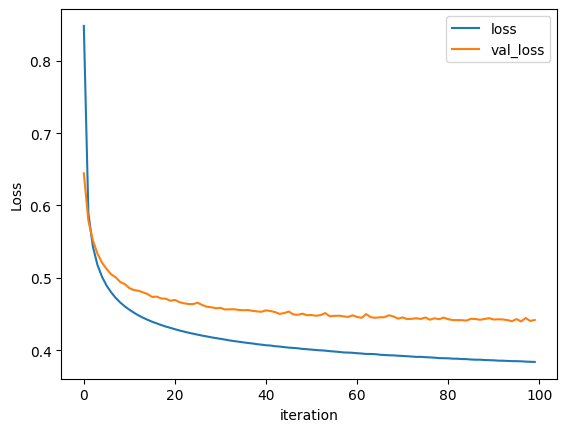

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

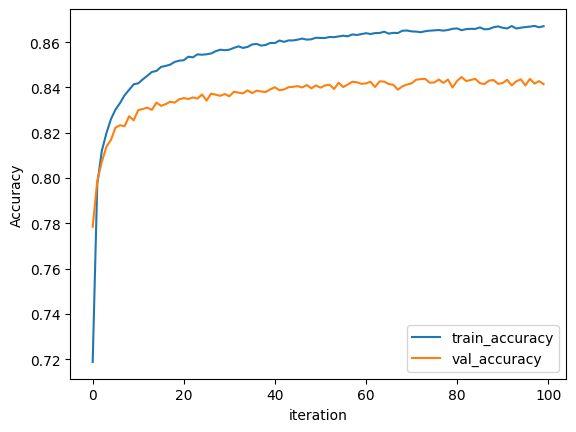

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 2.4. Softmax_Tape

In [35]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [36]:
# data normalization

mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

In [37]:
X_train.shape

(60000, 784)

In [42]:
import tensorflow as tf
import tensorflow.keras as keras

def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x,W)+ b)

# weights 
W = tf.Variable(tf.random.normal((784,10),
                                 mean=0, stddev=0.01, dtype=tf.float64))
b = tf.Variable(tf.zeros((10,), dtype=tf.float64))

# loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# loss function
lr = 0.01
num_epochs = 50
losses = []

for epoch in range(num_epochs):
    with tf.GradientTape(persistent=True) as t:
        # predict
        y_hat = predict(X_train, W, b)

        # losses
        loss = loss_fn(y_train, y_hat)
        losses.append(loss.numpy())
        
    # gradient
    dW, db = t.gradient(loss, [W, b])

    # update
    W.assign_sub(lr*dW) 
    b.assign_sub(lr*db)

Text(0, 0.5, 'Loss')

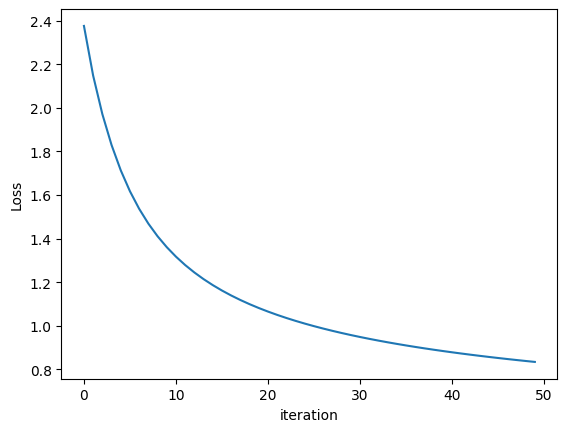

In [44]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [43]:
preds = predict(X_test, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y_test)
print(acc.mean())

0.7376
